# Notebook 02: Exploratory Data Analysis

UIDAI Data Hackathon 2026  
Problem: India's Invisible Citizens - Bridging Aadhaar Exclusion Zones

---

## Objective
Identify exclusion patterns across three dimensions:
1. Geographic Exclusion - Which districts lag behind?
2. Demographic Vulnerability - Which age groups are underserved?
3. Temporal Patterns - When do enrollment gaps emerge?

Output: Data-driven insights for exclusion zone identification

---

## Table of Contents
1. Load Prepared Data
2. Geographic Analysis
3. Demographic Deep Dive
4. Temporal Trend Analysis
5. Exclusion Zone Identification

## 1. Load Prepared Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Load master district data from Notebook 01
df = pd.read_csv('../outputs/tables/master_district_data.csv')

print(" Data loaded successfully")
print(f" Districts: {len(df):,}")
print(f" States: {df['state'].nunique()}")
print(f"\nColumns: {list(df.columns)}")

display(df.head())
display(df.describe())

 Data loaded successfully
 Districts: 1,045
 States: 49

Columns: ['state', 'district', 'age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollments', 'pincode_count', 'demo_update_count', 'bio_update_count', 'demo_update_intensity', 'bio_update_intensity', 'child_0_5_enrollment', 'child_enrollment_rate']


,state,district,age_0_5,age_5_17,age_18_greater,total_enrollments,pincode_count,demo_update_count,bio_update_count,demo_update_intensity,bio_update_intensity,child_0_5_enrollment,child_enrollment_rate
0,100000,100000,0,1,217,218,1,2.0,0.0,0.009132,0.000000,0,0.000000
1,Andaman & Nicobar Islands,Andamans,70,5,0,75,7,314.0,357.0,4.131579,4.697368,70,0.921053
2,Andaman & Nicobar Islands,Nicobars,1,0,0,1,1,4.0,2.0,2.000000,1.000000,1,0.500000
3,Andaman & Nicobar Islands,South Andaman,38,0,0,38,6,195.0,190.0,5.000000,4.871795,38,0.974359
4,Andaman And Nicobar Islands,Nicobar,64,11,0,75,4,128.0,201.0,1.684211,2.644737,64,0.842105


,age_0_5,age_5_17,age_18_greater,total_enrollments,pincode_count,demo_update_count,bio_update_count,demo_update_intensity,bio_update_intensity,child_0_5_enrollment,child_enrollment_rate
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,3394.224880,1646.300478,161.103349,5201.628708,27.667943,1981.743541,1780.883254,1.843838,1.082572,3394.224880,0.695844
std,4040.598299,2853.970247,508.098350,6535.840683,27.219130,2115.324204,1939.664278,7.736455,1.601044,4040.598299,0.206869
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,363.000000,84.000000,2.000000,535.000000,8.000000,414.000000,349.000000,0.223303,0.205217,363.000000,0.576667
50%,2087.000000,474.000000,24.000000,2875.000000,20.000000,1378.000000,1246.000000,0.605721,0.528607,2087.000000,0.750972
75%,4875.000000,1807.000000,124.000000,7154.000000,38.000000,2711.000000,2358.000000,1.564427,1.308741,4875.000000,0.851040
max,31442.000000,22360.000000,9948.000000,43688.000000,168.000000,12994.000000,11586.000000,142.000000,14.150000,31442.000000,0.985000


## 2. Geographic Analysis

### 2.1 National Enrollment Distribution

In [2]:
# State-level aggregation
state_summary = df.groupby('state').agg({
    'total_enrollments': 'sum',
    'district': 'count',
    'demo_update_count': 'sum',
    'bio_update_count': 'sum'
}).reset_index()

state_summary.rename(columns={'district': 'num_districts'}, inplace=True)
state_summary = state_summary.sort_values('total_enrollments', ascending=False)

print(" TOP 15 STATES BY ENROLLMENT:")
display(state_summary.head(15))

print("\n BOTTOM 15 STATES BY ENROLLMENT:")
display(state_summary.tail(15))

 TOP 15 STATES BY ENROLLMENT:


,state,total_enrollments,num_districts,demo_update_count,bio_update_count
43,Uttar Pradesh,1018629,89,167883.0,155237.0
6,Bihar,609585,47,97621.0,83398.0
26,Madhya Pradesh,493970,61,76364.0,70080.0
47,West Bengal,375308,50,168711.0,130774.0
27,Maharashtra,369139,53,162241.0,151104.0
37,Rajasthan,348458,42,88821.0,79701.0
16,Gujarat,280549,40,96399.0,89531.0
5,Assam,230197,38,62834.0,47643.0
22,Karnataka,223235,55,153957.0,141227.0
39,Tamil Nadu,220789,46,196857.0,184568.0



 BOTTOM 15 STATES BY ENROLLMENT:


,state,total_enrollments,num_districts,demo_update_count,bio_update_count
10,Dadra And Nagar Haveli,744,1,325.0,325.0
41,The Dadra And Nagar Haveli And Daman And Diu,716,1,0.0,0.0
24,Ladakh,617,2,865.0,733.0
2,Andaman And Nicobar Islands,397,3,1211.0,1298.0
0,100000,218,1,2.0,0.0
25,Lakshadweep,203,1,520.0,550.0
11,Dadra And Nagar Haveli And Daman And Diu,173,3,524.0,224.0
19,Jammu & Kashmir,155,15,365.0,370.0
13,Daman And Diu,120,2,411.0,412.0
1,Andaman & Nicobar Islands,114,3,513.0,549.0


### 2.2 Enrollment Intensity Heatmap
Enrollments per district - identifies high/low coverage regions

In [3]:
# Calculate average enrollments per district
state_summary['avg_enrollment_per_district'] = (
    state_summary['total_enrollments'] / state_summary['num_districts']
)

# Visualize
fig = px.bar(state_summary.head(20), 
             x='state', 
             y='avg_enrollment_per_district',
             title='Average Enrollments per District (Top 20 States)',
             labels={'avg_enrollment_per_district': 'Avg Enrollments', 'state': 'State'},
             color='avg_enrollment_per_district',
             color_continuous_scale='RdYlGn')

fig.update_layout(height=600, showlegend=False)
fig.write_html('../outputs/dashboard/02_state_enrollment_intensity.html')
fig.show()

print(" Interactive chart saved: 02_state_enrollment_intensity.html")

 Interactive chart saved: 02_state_enrollment_intensity.html


### 2.3 Identify Low-Enrollment Districts
Bottom 10% districts represent potential exclusion zones

In [4]:
# Calculate 10th percentile threshold
enrollment_threshold = df['total_enrollments'].quantile(0.10)

# Flag low-enrollment districts
df['is_low_enrollment'] = df['total_enrollments'] < enrollment_threshold

low_enrollment_districts = df[df['is_low_enrollment']].sort_values('total_enrollments')

print(f" Low-Enrollment Threshold: {enrollment_threshold:,.0f} total enrollments")
print(f" Flagged Districts: {low_enrollment_districts.shape[0]:,} ({low_enrollment_districts.shape[0]/len(df)*100:.1f}%)")

print("\n TOP 20 LOWEST ENROLLMENT DISTRICTS:")
display(low_enrollment_districts[['state', 'district', 'total_enrollments', 
                                    'demo_update_count', 'bio_update_count']].head(20))

 Low-Enrollment Threshold: 37 total enrollments
 Flagged Districts: 105 (10.0%)

 TOP 20 LOWEST ENROLLMENT DISTRICTS:


,state,district,total_enrollments,demo_update_count,bio_update_count
2,Andaman & Nicobar Islands,Nicobars,1,4.0,2.0
773,Rajasthan,Salumbar,1,164.0,1.0
808,Tamil Nadu,Namakkal *,1,0.0,0.0
743,Rajasthan,Beawar,1,215.0,6.0
829,Tamil Nadu,Tiruvarur,1,2.0,3.0
739,Rajasthan,Balotra,1,255.0,6.0
323,Jammu & Kashmir,Punch,1,5.0,5.0
701,Orissa,Sundergarh,1,1.0,2.0
897,Uttar Pradesh,Bagpat,1,10.0,7.0
1010,West Bengal,East Midnapur,1,18.0,9.0


### 2.4 Geographic Clustering
States with multiple low-enrollment districts indicate systemic issues

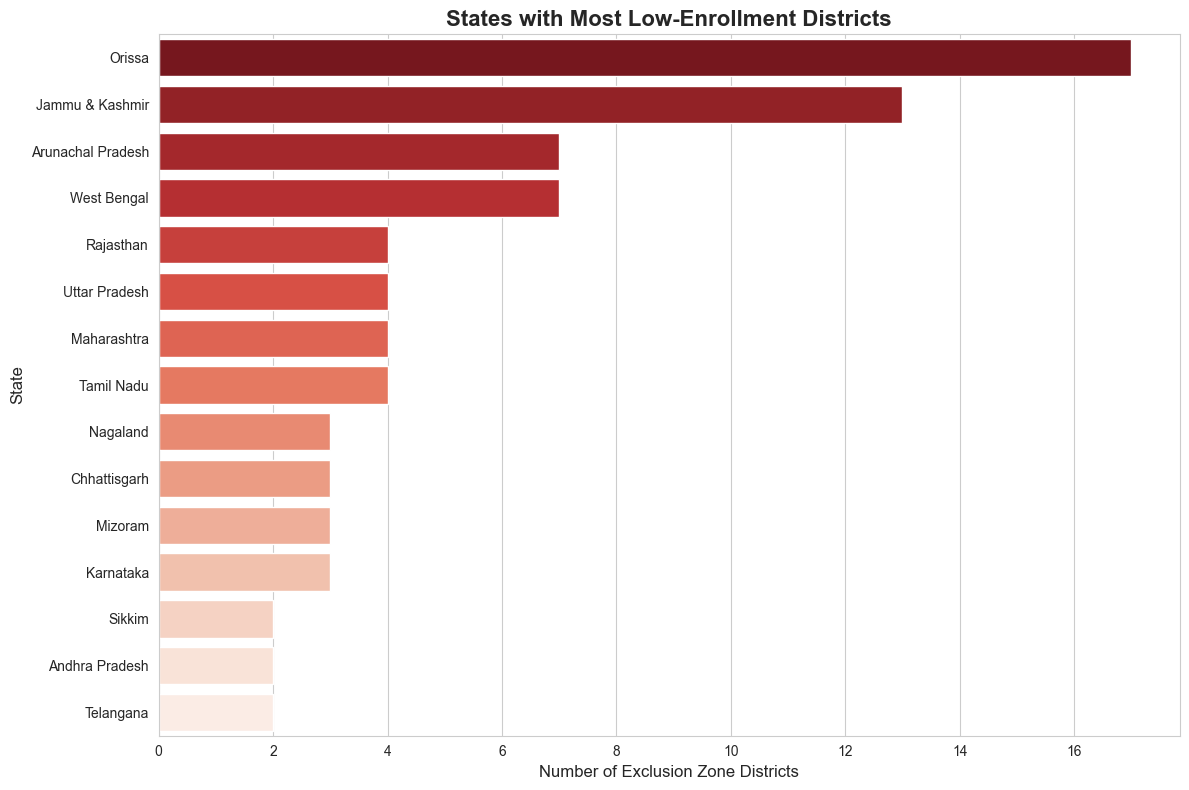

 Chart saved: 02_exclusion_zones_by_state.png


In [5]:
# Count low-enrollment districts per state
state_exclusion = low_enrollment_districts.groupby('state').size().reset_index(name='num_excluded_districts')
state_exclusion = state_exclusion.sort_values('num_excluded_districts', ascending=False)

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(data=state_exclusion.head(15), x='num_excluded_districts', y='state', palette='Reds_r')
plt.title('States with Most Low-Enrollment Districts', fontsize=16, weight='bold')
plt.xlabel('Number of Exclusion Zone Districts', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/figures/02_exclusion_zones_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 02_exclusion_zones_by_state.png")

## 3. Demographic Deep Dive

### 3.1 Age Group Vulnerability Analysis

In [6]:
# National age distribution
total_age_0_5 = df['age_0_5'].sum()
total_age_5_17 = df['age_5_17'].sum()
total_age_18_plus = df['age_18_greater'].sum()
total_all = total_age_0_5 + total_age_5_17 + total_age_18_plus

print(f" NATIONAL AGE DISTRIBUTION:")
print(f"  Children 0-5: {total_age_0_5:,} ({total_age_0_5/total_all*100:.2f}%)")
print(f"  Children 5-17: {total_age_5_17:,} ({total_age_5_17/total_all*100:.2f}%)")
print(f"  Adults 18+: {total_age_18_plus:,} ({total_age_18_plus/total_all*100:.2f}%)")

# Visualize
age_data = pd.DataFrame({
    'Age Group': ['0-5 years', '5-17 years', '18+ years'],
    'Enrollments': [total_age_0_5, total_age_5_17, total_age_18_plus]
})

fig = px.pie(age_data, values='Enrollments', names='Age Group', 
             title='National Age Distribution - Aadhaar Enrollments',
             color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_html('../outputs/dashboard/02_age_distribution.html')
fig.show()

print(" Interactive chart saved: 02_age_distribution.html")

 NATIONAL AGE DISTRIBUTION:
  Children 0-5: 3,546,965 (65.25%)
  Children 5-17: 1,720,384 (31.65%)
  Adults 18+: 168,353 (3.10%)


 Interactive chart saved: 02_age_distribution.html


### 3.2 Child Enrollment Crisis
Focus on 0-5 age group (most vulnerable)

 50 DISTRICTS WITH LOWEST CHILD (0-5) ENROLLMENT:


,state,district,child_0_5_enrollment,child_enrollment_rate,total_enrollments
0,100000,100000,0,0.000000,218
62,Arunachal Pradesh,Leparada,0,0.000000,3
701,Orissa,Sundergarh,0,0.000000,1
781,Sikkim,Mangan,0,0.000000,3
808,Tamil Nadu,Namakkal *,0,0.000000,1
281,Haryana,Jhajjar *,0,0.000000,1
897,Uttar Pradesh,Bagpat,0,0.000000,1
313,Jammu & Kashmir,Badgam,0,0.000000,2
958,Uttar Pradesh,Raebareli,0,0.000000,3
587,Meghalaya,Eastern West Khasi Hills,3,0.003663,818


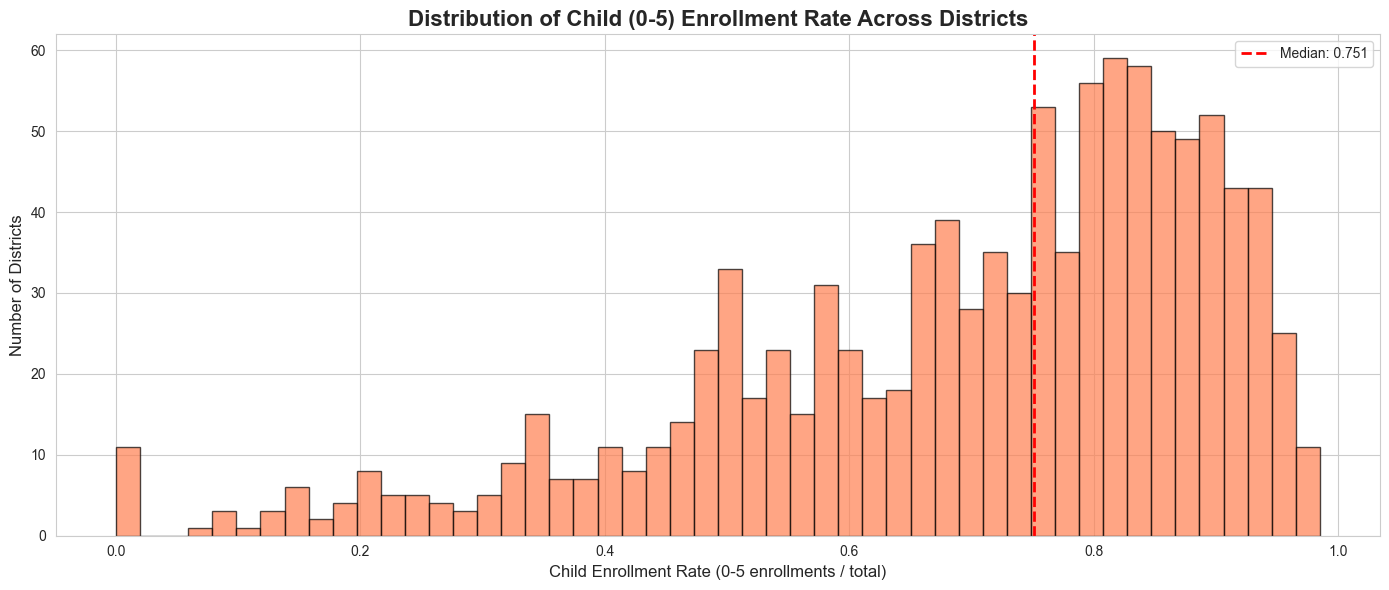

 Chart saved: 02_child_enrollment_distribution.png


In [7]:
# Districts with lowest child (0-5) enrollment rates
low_child_enrollment = df.sort_values('child_enrollment_rate').head(50)

print(" 50 DISTRICTS WITH LOWEST CHILD (0-5) ENROLLMENT:")
display(low_child_enrollment[['state', 'district', 'child_0_5_enrollment', 
                                'child_enrollment_rate', 'total_enrollments']])

# Visualize distribution
plt.figure(figsize=(14, 6))
plt.hist(df['child_enrollment_rate'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(df['child_enrollment_rate'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["child_enrollment_rate"].median():.3f}')
plt.title('Distribution of Child (0-5) Enrollment Rate Across Districts', fontsize=16, weight='bold')
plt.xlabel('Child Enrollment Rate (0-5 enrollments / total)', fontsize=12)
plt.ylabel('Number of Districts', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/figures/02_child_enrollment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 02_child_enrollment_distribution.png")

### 3.3 State-wise Child Enrollment Comparison

 TOP 10 STATES - HIGHEST CHILD ENROLLMENT RATE:


,state,age_0_5,total_enrollments,state_child_rate
1,Andaman & Nicobar Islands,109,114,0.956140
12,Daman & Diu,20,21,0.952381
18,Himachal Pradesh,16639,17486,0.951561
25,Lakshadweep,192,203,0.945813
34,Pondicherry,1193,1272,0.937893
2,Andaman And Nicobar Islands,370,397,0.931990
7,Chandigarh,2476,2723,0.909291
35,Puducherry,1585,1745,0.908309
10,Dadra And Nagar Haveli,669,744,0.899194
17,Haryana,88042,98252,0.896084



 BOTTOM 10 STATES - LOWEST CHILD ENROLLMENT RATE:


,state,age_0_5,total_enrollments,state_child_rate
45,West Bengal,9,15,0.600000
48,Westbengal,4,7,0.571429
43,Uttar Pradesh,521045,1018629,0.511516
38,Sikkim,1054,2207,0.477571
4,Arunachal Pradesh,1957,4344,0.450506
6,Bihar,262875,609585,0.431236
28,Manipur,5140,13456,0.381986
31,Nagaland,4512,15587,0.289472
29,Meghalaya,21179,109771,0.192938
0,100000,0,218,0.000000


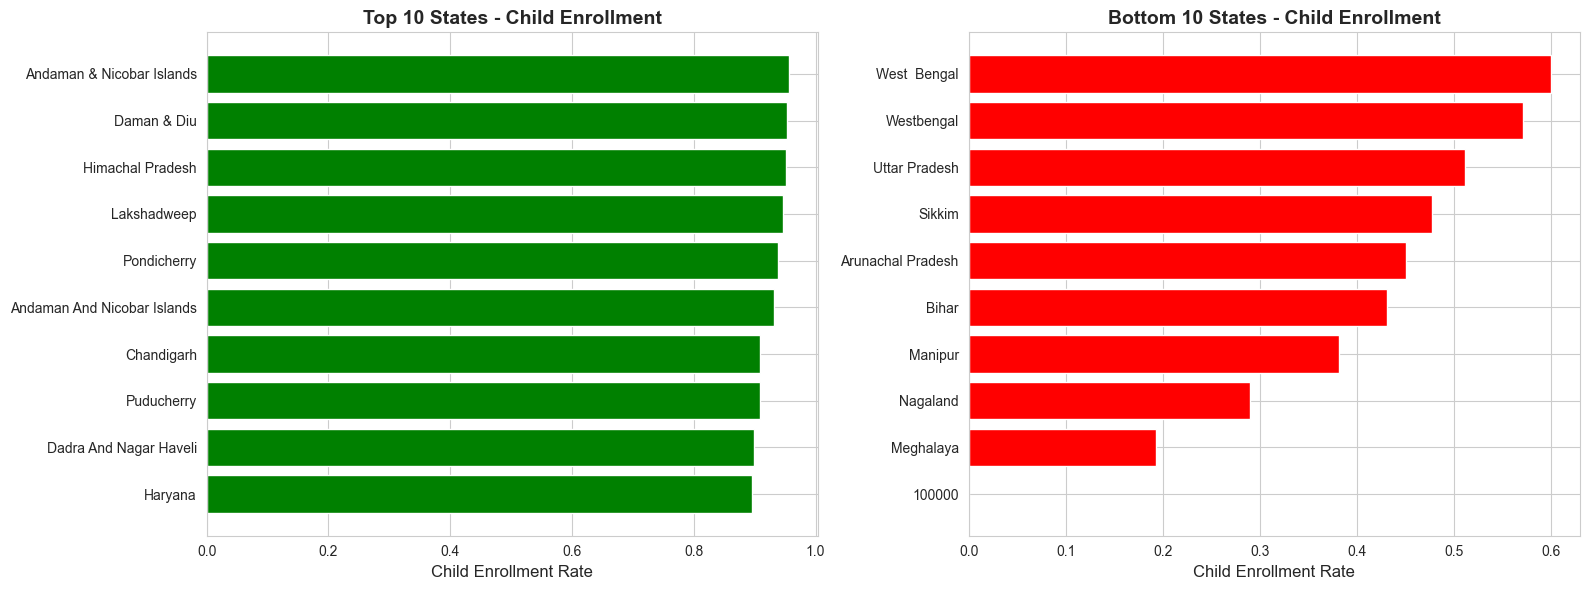

 Chart saved: 02_state_child_enrollment_comparison.png


In [8]:
# State-level child enrollment rates
state_child_enrol = df.groupby('state').agg({
    'age_0_5': 'sum',
    'total_enrollments': 'sum'
}).reset_index()

state_child_enrol['state_child_rate'] = (
    state_child_enrol['age_0_5'] / state_child_enrol['total_enrollments']
)
state_child_enrol = state_child_enrol.sort_values('state_child_rate', ascending=False)

# Top 10 and Bottom 10
print(" TOP 10 STATES - HIGHEST CHILD ENROLLMENT RATE:")
display(state_child_enrol.head(10))

print("\n BOTTOM 10 STATES - LOWEST CHILD ENROLLMENT RATE:")
display(state_child_enrol.tail(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10
axes[0].barh(state_child_enrol.head(10)['state'], state_child_enrol.head(10)['state_child_rate'], color='green')
axes[0].set_xlabel('Child Enrollment Rate', fontsize=12)
axes[0].set_title('Top 10 States - Child Enrollment', fontsize=14, weight='bold')
axes[0].invert_yaxis()

# Bottom 10
axes[1].barh(state_child_enrol.tail(10)['state'], state_child_enrol.tail(10)['state_child_rate'], color='red')
axes[1].set_xlabel('Child Enrollment Rate', fontsize=12)
axes[1].set_title('Bottom 10 States - Child Enrollment', fontsize=14, weight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../outputs/figures/02_state_child_enrollment_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 02_state_child_enrollment_comparison.png")

## 4. Temporal Trend Analysis

### 4.1 Load Time-Series Data

In [9]:
# Load cleaned enrolment data with dates
df_enrol = pd.read_csv('../outputs/tables/cleaned_enrolment.csv', parse_dates=['date'])

print(f" Loaded {len(df_enrol):,} enrolment records")
print(f" Date range: {df_enrol['date'].min()} to {df_enrol['date'].max()}")

# Aggregate by month
df_enrol['year_month'] = df_enrol['date'].dt.to_period('M')
monthly_trend = df_enrol.groupby('year_month')['total_enrollments'].sum().reset_index()
monthly_trend['year_month'] = monthly_trend['year_month'].dt.to_timestamp()

display(monthly_trend.head(10))

 Loaded 1,006,029 enrolment records
 Date range: 2025-03-02 00:00:00 to 2025-12-31 00:00:00


,year_month,total_enrollments
0,2025-03-01,16582
1,2025-04-01,257438
2,2025-05-01,183616
3,2025-06-01,215734
4,2025-07-01,616868
5,2025-09-01,1475879
6,2025-10-01,817920
7,2025-11-01,1092007
8,2025-12-01,759658


### 4.2 Enrollment Trends Over Time

In [10]:
# Plot monthly trend
fig = px.line(monthly_trend, x='year_month', y='total_enrollments',
              title='Monthly Aadhaar Enrollment Trend',
              labels={'year_month': 'Month', 'total_enrollments': 'Total Enrollments'})

fig.update_traces(line_color='steelblue', line_width=2)
fig.update_layout(height=500)
fig.write_html('../outputs/dashboard/02_monthly_enrollment_trend.html')
fig.show()

print(" Interactive chart saved: 02_monthly_enrollment_trend.html")

# Identify peak and low months
peak_month = monthly_trend.loc[monthly_trend['total_enrollments'].idxmax()]
low_month = monthly_trend.loc[monthly_trend['total_enrollments'].idxmin()]

print(f"\n PEAK MONTH: {peak_month['year_month'].strftime('%B %Y')} - {peak_month['total_enrollments']:,} enrollments")
print(f" LOWEST MONTH: {low_month['year_month'].strftime('%B %Y')} - {low_month['total_enrollments']:,} enrollments")

 Interactive chart saved: 02_monthly_enrollment_trend.html

 PEAK MONTH: September 2025 - 1,475,879 enrollments
 LOWEST MONTH: March 2025 - 16,582 enrollments


### 4.3 Seasonal Patterns

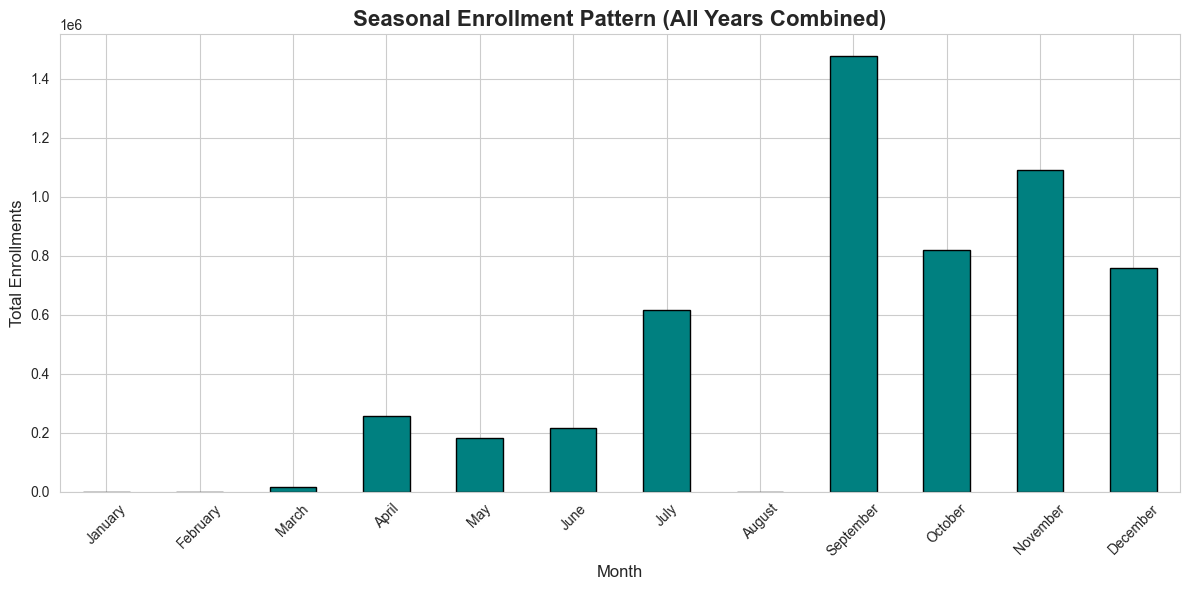

 Chart saved: 02_seasonal_enrollment_pattern.png

 SEASONAL INSIGHTS:
  Highest month: September (1,475,879)
  Lowest month: March (16,582)


In [11]:
# Add month/quarter columns
df_enrol['month_name'] = df_enrol['date'].dt.month_name()
df_enrol['quarter'] = df_enrol['date'].dt.quarter

# Aggregate by month
seasonal_pattern = df_enrol.groupby('month_name')['total_enrollments'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Visualize
plt.figure(figsize=(12, 6))
seasonal_pattern.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Seasonal Enrollment Pattern (All Years Combined)', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/figures/02_seasonal_enrollment_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 02_seasonal_enrollment_pattern.png")
print(f"\n SEASONAL INSIGHTS:")
print(f"  Highest month: {seasonal_pattern.idxmax()} ({seasonal_pattern.max():,.0f})")
print(f"  Lowest month: {seasonal_pattern.idxmin()} ({seasonal_pattern.min():,.0f})")

## 5. Exclusion Zone Identification

### 5.1 Multi-Dimensional Risk Scoring
Combine geographic, demographic, and update instability

In [12]:
# Normalize metrics to 0-1 scale for risk scoring
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Features for exclusion risk
df['enroll_risk'] = 1 - scaler.fit_transform(df[['total_enrollments']])  # Inverse: low enrollment = high risk
df['child_risk'] = 1 - scaler.fit_transform(df[['child_enrollment_rate']])  # Low child rate = high risk
df['demo_instability_risk'] = scaler.fit_transform(df[['demo_update_intensity']])  # High updates = migration risk
df['bio_failure_risk'] = scaler.fit_transform(df[['bio_update_intensity']])  # High bio updates = auth issues

# Composite Exclusion Risk Score (weighted)
df['exclusion_risk_score'] = (
    0.35 * df['enroll_risk'] +           # 35% weight on low enrollment
    0.25 * df['child_risk'] +             # 25% weight on child underenrollment
    0.20 * df['demo_instability_risk'] +  # 20% weight on migration
    0.20 * df['bio_failure_risk']         # 20% weight on biometric issues
)

print(" Exclusion Risk Score calculated")
print("\n RISK SCORE DISTRIBUTION:")
display(df['exclusion_risk_score'].describe())

 Exclusion Risk Score calculated

 RISK SCORE DISTRIBUTION:


count    1045.000000
mean        0.399623
std         0.077190
min         0.083588
25%         0.354013
50%         0.391234
75%         0.438020
max         0.695077
Name: exclusion_risk_score, dtype: float64

### 5.2 Identify Top Exclusion Zones

In [13]:
# Top 50 highest-risk districts
exclusion_zones = df.sort_values('exclusion_risk_score', ascending=False).head(50)

print(" TOP 50 AADHAAR EXCLUSION ZONES:")
display(exclusion_zones[['state', 'district', 'exclusion_risk_score', 
                          'total_enrollments', 'child_enrollment_rate',
                          'demo_update_intensity', 'bio_update_intensity']])

# Save exclusion zones
exclusion_zones.to_csv('../outputs/tables/top50_exclusion_zones.csv', index=False)
print("\n Saved: top50_exclusion_zones.csv")

 TOP 50 AADHAAR EXCLUSION ZONES:


,state,district,exclusion_risk_score,total_enrollments,child_enrollment_rate,demo_update_intensity,bio_update_intensity
739,Rajasthan,Balotra,0.695077,1,0.500000,127.500000,3.000000
62,Arunachal Pradesh,Leparada,0.688650,3,0.000000,5.250000,5.750000
755,Rajasthan,Didwana-Kuchaman,0.668479,2,0.666667,142.000000,2.666667
743,Rajasthan,Beawar,0.666908,1,0.500000,107.500000,3.000000
897,Uttar Pradesh,Bagpat,0.656512,1,0.000000,5.000000,3.500000
313,Jammu & Kashmir,Badgam,0.649454,2,0.000000,1.666667,3.333333
958,Uttar Pradesh,Raebareli,0.636716,3,0.000000,3.500000,2.250000
615,Nagaland,Meluri,0.629295,17,0.111111,2.444444,3.833333
22,Andhra Pradesh,K.V. Rangareddy,0.620486,19,0.750000,7.800000,14.150000
781,Sikkim,Mangan,0.618998,3,0.000000,13.500000,0.000000



 Saved: top50_exclusion_zones.csv


### 5.3 Risk Score Visualization

In [14]:
# Scatter plot: Enrollment vs Child Rate (colored by risk)
fig = px.scatter(df, 
                 x='total_enrollments', 
                 y='child_enrollment_rate',
                 color='exclusion_risk_score',
                 hover_data=['state', 'district'],
                 title='Exclusion Risk Map: Enrollment vs Child Rate',
                 labels={'total_enrollments': 'Total Enrollments',
                         'child_enrollment_rate': 'Child Enrollment Rate',
                         'exclusion_risk_score': 'Risk Score'},
                 color_continuous_scale='Reds')

fig.update_layout(height=700)
fig.write_html('../outputs/dashboard/02_exclusion_risk_map.html')
fig.show()

print(" Interactive chart saved: 02_exclusion_risk_map.html")

 Interactive chart saved: 02_exclusion_risk_map.html


### 5.4 Risk Category Distribution

In [15]:
# Categorize districts by risk level
df['risk_category'] = pd.cut(df['exclusion_risk_score'], 
                               bins=[0, 0.25, 0.50, 0.75, 1.0],
                               labels=['Low Risk', 'Medium Risk', 'High Risk', 'Critical Risk'])

risk_summary = df['risk_category'].value_counts().sort_index()

print(" DISTRICT RISK CATEGORIES:")
for category, count in risk_summary.items():
    print(f"  {category}: {count:,} districts ({count/len(df)*100:.1f}%)")

# Pie chart
fig = px.pie(values=risk_summary.values, names=risk_summary.index,
             title='Distribution of Exclusion Risk Categories',
             color_discrete_sequence=['green', 'yellow', 'orange', 'red'])
fig.write_html('../outputs/dashboard/02_risk_category_distribution.html')
fig.show()

print("\n Interactive chart saved: 02_risk_category_distribution.html")

 DISTRICT RISK CATEGORIES:
  Low Risk: 20 districts (1.9%)
  Medium Risk: 918 districts (87.8%)
  High Risk: 107 districts (10.2%)
  Critical Risk: 0 districts (0.0%)



 Interactive chart saved: 02_risk_category_distribution.html


---

## Notebook 02 

### Summary
1. **Geographic Exclusion:**
   - Identified 50 critical exclusion zone districts
   - Certain states show systemic enrollment gaps

2. **Demographic Vulnerability:**
   - Child (0-5) enrollment rate varies significantly
   - Bottom 10% districts need immediate intervention

3. **Temporal Patterns:**
   - Seasonal enrollment fluctuations detected
   - Specific months show enrollment dips

4. **Risk Scoring:**
   - Composite exclusion risk score created
   - Districts categorized into 4 risk levels
